In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


We have 12 columns in the dataset. The "quality" column will be the dependent variable. First of all, we would like to know if there is a null value.

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The dataset does not contain any null value.

Now let's see how much the features affect the "quality" data.

In [5]:
df.corr()["quality"].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

As expected, alcohol data is the most affect quality data positively. Quality will be higher while the amount of alcohol increases.

Now we have to seperate the dependent variable, and split the data into train and test.

In [9]:
y = df["quality"].values
x = df.drop("quality", axis=1).values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [12]:
from sklearn import preprocessing

In [13]:
scaler = preprocessing.MinMaxScaler()

In [14]:
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression()

In [22]:
reg.fit(X_train, y_train)

LinearRegression()

In [23]:
pred = reg.predict(X_test)

In [52]:
pred

array([5.74910274, 5.03339559, 6.59979132, 5.37093122, 5.91989176,
       5.05941984, 5.41802254, 6.00585148, 4.83240203, 4.97485953,
       5.33298637, 5.4493321 , 5.73688655, 5.10011335, 5.55217885,
       6.4017425 , 6.82637051, 5.79749415, 5.94741288, 5.09421966,
       6.31952916, 5.19156271, 5.61756646, 6.1842649 , 5.51819855,
       5.00402405, 5.19137183, 6.52063411, 5.33698702, 6.22924721,
       6.07766407, 5.86419553, 5.52829477, 5.300859  , 5.71754242,
       6.2270965 , 5.20330876, 5.48951943, 6.37468431, 5.77405869,
       5.4401811 , 6.05682007, 6.71020388, 6.59656132, 6.01640986,
       4.78944644, 5.53191689, 6.01528403, 5.51786046, 6.11066512,
       5.37272252, 5.3604719 , 5.80594032, 6.34479807, 5.72858333,
       5.20978949, 5.08697323, 5.32291488, 6.50993011, 5.46012516,
       5.16507494, 5.76381693, 6.04404791, 6.29527108, 5.05993966,
       6.12597886, 5.37461431, 5.99326971, 6.12438229, 6.03380514,
       5.30943385, 5.47791589, 5.04622338, 5.57801381, 5.64337

The predictions are in decimal, so we need to round them.

In [53]:
y_pred = np.round(pred)

In [54]:
y_pred

array([6., 5., 7., 5., 6., 5., 5., 6., 5., 5., 5., 5., 6., 5., 6., 6., 7.,
       6., 6., 5., 6., 5., 6., 6., 6., 5., 5., 7., 5., 6., 6., 6., 6., 5.,
       6., 6., 5., 5., 6., 6., 5., 6., 7., 7., 6., 5., 6., 6., 6., 6., 5.,
       5., 6., 6., 6., 5., 5., 5., 7., 5., 5., 6., 6., 6., 5., 6., 5., 6.,
       6., 6., 5., 5., 5., 6., 6., 6., 5., 5., 6., 6., 6., 5., 6., 6., 6.,
       5., 6., 5., 5., 5., 5., 5., 6., 5., 6., 5., 6., 5., 5., 6., 7., 6.,
       6., 6., 6., 5., 6., 5., 6., 5., 6., 5., 6., 5., 6., 6., 6., 6., 6.,
       6., 5., 6., 5., 5., 6., 6., 5., 5., 6., 6., 5., 5., 6., 6., 6., 5.,
       6., 5., 6., 5., 6., 5., 6., 5., 6., 6., 6., 6., 6., 5., 6., 6., 5.,
       6., 6., 5., 5., 5., 6., 6., 6., 6., 6., 5., 6., 5., 6., 6., 5., 6.,
       6., 6., 5., 7., 6., 6., 6., 7., 6., 5., 5., 7., 5., 6., 7., 5., 6.,
       6., 5., 6., 6., 6., 5., 5., 5., 5., 5., 5., 5., 5., 5., 6., 5., 5.,
       5., 5., 5., 6., 6., 5., 6., 6., 5., 6., 5., 5., 6., 6., 6., 5., 5.,
       6., 6., 6., 5., 6.

Now let's compare predictions with test data.

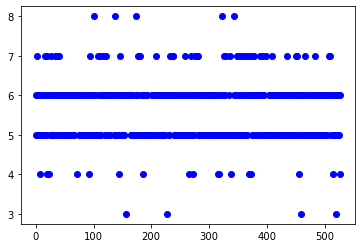

In [57]:
plt.scatter(range(len(y_test)), y_test, color="blue")

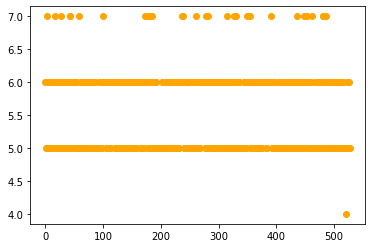

In [58]:
plt.scatter(range(len(y_pred)), y_pred, color="orange")